# PyOR Quantum
### Author: Vineeth Thalakottoor
### Introduction to PyOR Quantum

In [1]:
SourcePath = '/media/HD2/Vineeth/PostDoc_Simulations/Github/PyOR_V1/Source'
import sys
sys.path.append(SourcePath)

from PythonOnResonance_MagneticResonance import MagneticResonance 
from PythonOnResonance_Quantum import QunObj, QuantumLibrary, QuantumSystem

import time
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rc
%matplotlib ipympl
import sympy as sp
from sympy import *

### Introduction to Quantum System

In [2]:
SpinList = {"I": 1/2}

QS = QuantumSystem(SpinList)
QLib = QuantumLibrary()

QS.SpinOperator(PrintDefault=False)

In [3]:
# Spin list
QS.slist

array([0.5])

In [4]:
# Number of spins
QS.Nspins

1

In [5]:
# Spin dictionary
QS.SpinDic

['I']

In [6]:
# Dimension of each individual spin system
QS.Sdim

array([2])

In [7]:
QS.Vdim

2

In [8]:
# Dimension of Liouville space
QS.Ldim

4

### Spin operators

In [9]:
# Ix object
QS.Ix

In [10]:
# X component of spin I
QS.Ix.matrix

Matrix([
[  0, 0.5],
[0.5,   0]])

In [11]:
# Identy matrix
QS.Iid.matrix

Matrix([
[1.0,   0],
[  0, 1.0]])

### Spin operators of sub sysytem

In [12]:
# X component of I
QS.Ix_sub.matrix

Matrix([
[  0, 0.5],
[0.5,   0]])

In [13]:
# Identy matrix
QS.Iid_sub.matrix

Matrix([
[1.0,   0],
[  0, 1.0]])

### Schrödinger Equation

In [14]:
# Initial State
vec = QLib.Basis_Ket(2,0)

In [15]:
vec.matrix

Matrix([
[1.0],
[  0]])

In [16]:
# Rotate by 90 deg about X axis
vec = vec.Rotate(90,QS.Ix)

In [17]:
vec.Round(3).matrix

Matrix([
[   0.707],
[-0.707*I]])

In [18]:
# Hamiltonian
Hz = 2.0 * np.pi * 10 * QS.Iz

In [19]:
Hz.matrix

Matrix([
[31.4159265358979,                 0],
[               0, -31.4159265358979]])

In [20]:
# Evolution
QLib.AcqAQ = 1
QLib.AcqDT = 0.001
t, vect = QLib.Evolve_SE_UProp(vec,Hz)

In [21]:
# Expectation
t, signal_SE = QLib.Expectation(t,vect,QS.Ix)

/opt/anaconda3/lib/python3.12/site-packages/matplotlib/cbook.py:1762: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
/opt/anaconda3/lib/python3.12/site-packages/matplotlib/cbook.py:1398: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


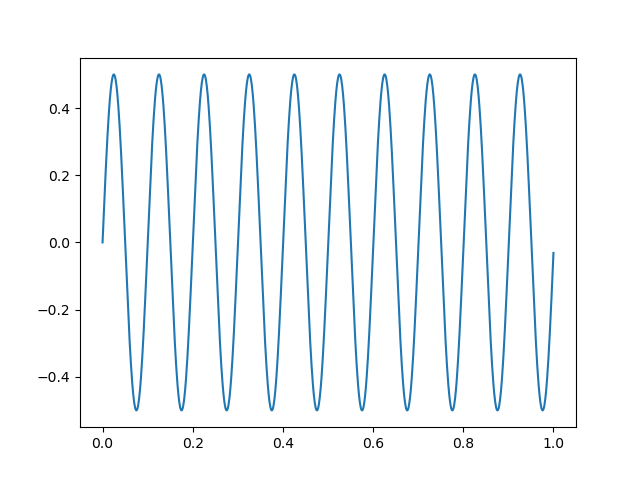

In [22]:
# Plotting
plt.figure(1)
plt.plot(t,signal_SE)

### Liouville Equation : Hilbert Space

In [23]:
# Initial density matrix
rho = QS.Iz

In [24]:
rho.matrix

Matrix([
[0.5,    0],
[  0, -0.5]])

In [25]:
# Rotate about x axis by 90 deg
rho = rho.Rotate(90,QS.Ix)

In [26]:
rho.matrix

Matrix([
[     0, 0.5*I],
[-0.5*I,     0]])

In [27]:
# Hamiltonian
Hz = 2.0 * np.pi * 10 * QS.Iz

In [28]:
# Evolution
QLib.AcqAQ = 1
QLib.AcqDT = 0.001
t, rhot = QLib.Evolve_Hilbert_UProp(rho,Hz)

In [29]:
# Expectation
t, signal_Hi = QLib.Expectation(t,rhot,QS.Ix)

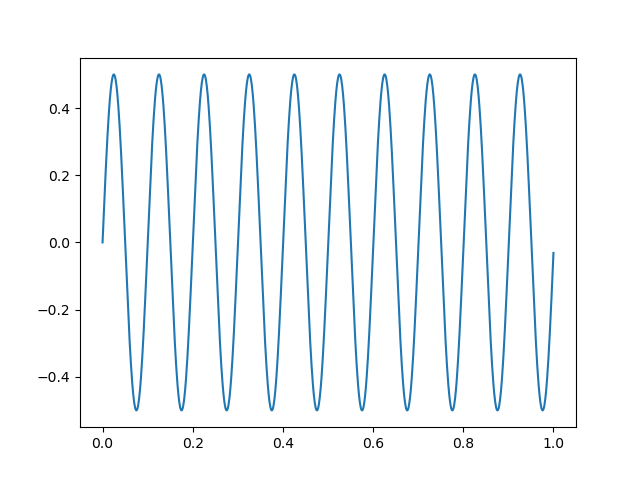

In [30]:
# Plotting
plt.figure(2)
plt.plot(t,signal_Hi)

### Liouville Equation : Liouville Space

In [31]:
# Initial density matrix
rhoL = QS.Iz

In [32]:
rhoL.matrix

Matrix([
[0.5,    0],
[  0, -0.5]])

In [33]:
# Vectorize
#Lib.RowColOrder = 'C' # Vectorize by row
QLib.RowColOrder = 'F' # Vectorize by col
Lrho = QLib.DMToVec(rhoL)

In [34]:
Lrho.matrix

Matrix([
[ 0.5],
[   0],
[   0],
[-0.5]])

In [35]:
# Rotate by 90 deg about X axis
Lrho = Lrho.Rotate(90,QLib.CommutationSuperoperator(QS.Ix))

In [36]:
Lrho.matrix

Matrix([
[     0],
[-0.5*I],
[ 0.5*I],
[     0]])

In [37]:
# Hamiltonian
Hz = 2.0 * np.pi * 10 * QS.Iz
HzL = QLib.CommutationSuperoperator(Hz)

In [38]:
Hz.matrix

Matrix([
[31.4159265358979,                 0],
[               0, -31.4159265358979]])

In [39]:
HzL.matrix

Matrix([
[0,                 0,                0, 0],
[0, -62.8318530717959,                0, 0],
[0,                 0, 62.8318530717959, 0],
[0,                 0,                0, 0]])

In [40]:
# Evolution
QLib.AcqAQ = 1
QLib.AcqDT = 0.001
t, Lrhot = QLib.Evolve_Liouville_UProp(Lrho,HzL)

In [41]:
# Expectation
t, signal_Li = QLib.Expectation(t,Lrhot,QLib.DMToVec(QS.Ix).Adjoint())

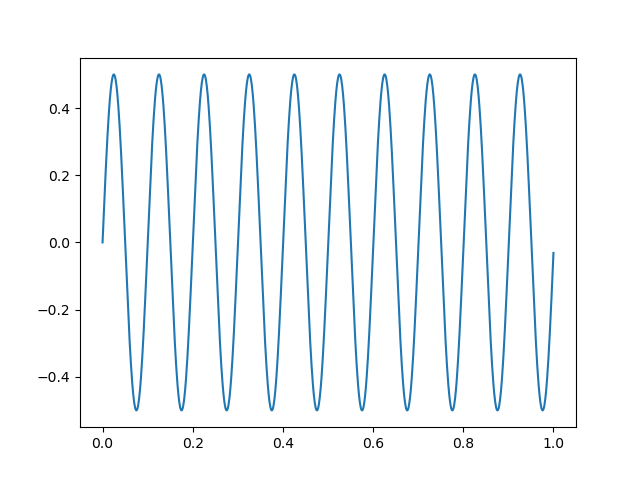

In [42]:
# Plotting
plt.figure(3)
plt.plot(t,signal_Li)